<h1 align='center'>
    Jacobiano do Manipulador PUMA 260
<h1>

<div align="center">
    <img src="puma260.png">
</div>

In [1]:
import numpy as np
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
puma = Robot((
    [theta1, 13, 0, rad(90)],
    [theta2, 3, 8, 0],
    [theta3+rad(90), 0, 0, rad(90)],
    [theta4, 8, 0, rad(-90)],
    [theta5-rad(90), 0, 0, rad(-90)],
    [theta6, 4, 0, 0]
))

### $$\text{Obtenção de } o_i^0 \text{ :}$$

In [3]:
n = len(puma.T) #número de juntas

o = [Matrix([[0], [0], [0]])]
for i in range(1, n+1):
    o.append(simplify(puma.HTM(0, i, False)[:3, 3]))

o

⎡⎡0⎤  ⎡0 ⎤  ⎡3⋅sin(θ₁) + 8⋅cos(θ₁)⋅cos(θ₂)⎤  ⎡3⋅sin(θ₁) + 8⋅cos(θ₁)⋅cos(θ₂)⎤  
⎢⎢ ⎥  ⎢  ⎥  ⎢                             ⎥  ⎢                             ⎥  
⎢⎢0⎥, ⎢0 ⎥, ⎢8⋅sin(θ₁)⋅cos(θ₂) - 3⋅cos(θ₁)⎥, ⎢8⋅sin(θ₁)⋅cos(θ₂) - 3⋅cos(θ₁)⎥, 
⎢⎢ ⎥  ⎢  ⎥  ⎢                             ⎥  ⎢                             ⎥  
⎣⎣0⎦  ⎣13⎦  ⎣       8⋅sin(θ₂) + 13        ⎦  ⎣       8⋅sin(θ₂) + 13        ⎦  

⎡3⋅sin(θ₁) + 8⋅cos(θ₁)⋅cos(θ₂) + 8⋅cos(θ₁)⋅cos(θ₂ + θ₃)⎤  ⎡3⋅sin(θ₁) + 8⋅cos(θ
⎢                                                      ⎥  ⎢                   
⎢8⋅sin(θ₁)⋅cos(θ₂) + 8⋅sin(θ₁)⋅cos(θ₂ + θ₃) - 3⋅cos(θ₁)⎥, ⎢8⋅sin(θ₁)⋅cos(θ₂) +
⎢                                                      ⎥  ⎢                   
⎣           8⋅sin(θ₂) + 8⋅sin(θ₂ + θ₃) + 13            ⎦  ⎣           8⋅sin(θ₂

₁)⋅cos(θ₂) + 8⋅cos(θ₁)⋅cos(θ₂ + θ₃)⎤  ⎡4⋅(sin(θ₁)⋅sin(θ₄) - sin(θ₂ + θ₃)⋅cos(θ
                                   ⎥  ⎢                                       
 8⋅sin(θ₁)⋅cos(θ₂ + θ₃) - 3⋅cos(θ₁)⎥, ⎢-4⋅(sin(θ₁)

### $$\text{Obtenção de } Z_{i-1}^0 = R_{i-1}^0k \text{ :}$$

In [4]:
z = [Matrix([[0], [0], [1]])]
for i in range(1, n):
    z.append(simplify(puma.HTM(0, i, False)[:3, 2]))

z

⎡⎡0⎤  ⎡sin(θ₁) ⎤  ⎡sin(θ₁) ⎤  ⎡cos(θ₁)⋅cos(θ₂ + θ₃)⎤  ⎡sin(θ₁)⋅cos(θ₄) + sin(θ
⎢⎢ ⎥  ⎢        ⎥  ⎢        ⎥  ⎢                    ⎥  ⎢                       
⎢⎢0⎥, ⎢-cos(θ₁)⎥, ⎢-cos(θ₁)⎥, ⎢sin(θ₁)⋅cos(θ₂ + θ₃)⎥, ⎢sin(θ₁)⋅sin(θ₄)⋅sin(θ₂ 
⎢⎢ ⎥  ⎢        ⎥  ⎢        ⎥  ⎢                    ⎥  ⎢                       
⎣⎣1⎦  ⎣   0    ⎦  ⎣   0    ⎦  ⎣    sin(θ₂ + θ₃)    ⎦  ⎣            -sin(θ₄)⋅co

₄)⋅sin(θ₂ + θ₃)⋅cos(θ₁)⎤  ⎡(sin(θ₁)⋅sin(θ₄) - sin(θ₂ + θ₃)⋅cos(θ₁)⋅cos(θ₄))⋅co
                       ⎥  ⎢                                                   
+ θ₃) - cos(θ₁)⋅cos(θ₄)⎥, ⎢-(sin(θ₁)⋅sin(θ₂ + θ₃)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁))⋅c
                       ⎥  ⎢                                                   
s(θ₂ + θ₃)             ⎦  ⎣                  -sin(θ₅)⋅sin(θ₂ + θ₃) + cos(θ₄)⋅c

s(θ₅) - sin(θ₅)⋅cos(θ₁)⋅cos(θ₂ + θ₃) ⎤⎤
                                     ⎥⎥
os(θ₅) - sin(θ₁)⋅sin(θ₅)⋅cos(θ₂ + θ₃)⎥⎥
                                     ⎥⎥
os(θ₅)⋅cos(θ₂ + θ₃)                  ⎦⎦

### $$\text{Obtenção do Jacobiano de velocidades lineares } J_{v_i} = z_{i-1}^0 \times \left( o_n^0 - o_{i-1}^0 \right) \text{ :}$$

In [5]:
jv = []
for i in range(1, n+1):
    if(puma.rotational[i-1]):
        jv.append(simplify(Matrix(np.cross(np.squeeze(z[i-1]), np.squeeze(o[-1] - o[i-1])).tolist())))
    else:
        jv.append(simplify(z[i-1]))

jv

⎡⎡4⋅(sin(θ₁)⋅sin(θ₂ + θ₃)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁))⋅cos(θ₅) + 4⋅sin(θ₁)⋅sin(θ
⎢⎢                                                                            
⎢⎢4⋅(sin(θ₁)⋅sin(θ₄) - sin(θ₂ + θ₃)⋅cos(θ₁)⋅cos(θ₄))⋅cos(θ₅) + 3⋅sin(θ₁) - 4⋅s
⎢⎢                                                                            
⎣⎣                                                                         0  

₅)⋅cos(θ₂ + θ₃) - 8⋅sin(θ₁)⋅cos(θ₂) - 8⋅sin(θ₁)⋅cos(θ₂ + θ₃) + 3⋅cos(θ₁)⎤  ⎡4⋅
                                                                        ⎥  ⎢  
in(θ₅)⋅cos(θ₁)⋅cos(θ₂ + θ₃) + 8⋅cos(θ₁)⋅cos(θ₂) + 8⋅cos(θ₁)⋅cos(θ₂ + θ₃)⎥, ⎢4⋅
                                                                        ⎥  ⎢  
                                                                        ⎦  ⎣  

(-2⋅sin(θ₂) + sin(θ₅)⋅sin(θ₂ + θ₃) - 2⋅sin(θ₂ + θ₃) - cos(θ₄)⋅cos(θ₅)⋅cos(θ₂ +
                                                                              
(-2⋅sin(θ₂) + sin(θ₅)⋅sin(θ₂ + θ₃) - 2⋅sin(θ₂ + θ₃

### $$\text{Obtenção do Jacobiano de velocidades angulares } J_{\omega_i} = z_{i-1}^0 \text{ :}$$

In [6]:
jw = []
for i in range(1, n+1):
    if(puma.rotational[i-1]):
        jw.append(simplify(z[i-1]))
    else:
        jw.append(Matrix([[0], [0], [0]]))

jw

⎡⎡0⎤  ⎡sin(θ₁) ⎤  ⎡sin(θ₁) ⎤  ⎡cos(θ₁)⋅cos(θ₂ + θ₃)⎤  ⎡sin(θ₁)⋅cos(θ₄) + sin(θ
⎢⎢ ⎥  ⎢        ⎥  ⎢        ⎥  ⎢                    ⎥  ⎢                       
⎢⎢0⎥, ⎢-cos(θ₁)⎥, ⎢-cos(θ₁)⎥, ⎢sin(θ₁)⋅cos(θ₂ + θ₃)⎥, ⎢sin(θ₁)⋅sin(θ₄)⋅sin(θ₂ 
⎢⎢ ⎥  ⎢        ⎥  ⎢        ⎥  ⎢                    ⎥  ⎢                       
⎣⎣1⎦  ⎣   0    ⎦  ⎣   0    ⎦  ⎣    sin(θ₂ + θ₃)    ⎦  ⎣            -sin(θ₄)⋅co

₄)⋅sin(θ₂ + θ₃)⋅cos(θ₁)⎤  ⎡(sin(θ₁)⋅sin(θ₄) - sin(θ₂ + θ₃)⋅cos(θ₁)⋅cos(θ₄))⋅co
                       ⎥  ⎢                                                   
+ θ₃) - cos(θ₁)⋅cos(θ₄)⎥, ⎢-(sin(θ₁)⋅sin(θ₂ + θ₃)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁))⋅c
                       ⎥  ⎢                                                   
s(θ₂ + θ₃)             ⎦  ⎣                  -sin(θ₅)⋅sin(θ₂ + θ₃) + cos(θ₄)⋅c

s(θ₅) - sin(θ₅)⋅cos(θ₁)⋅cos(θ₂ + θ₃) ⎤⎤
                                     ⎥⎥
os(θ₅) - sin(θ₁)⋅sin(θ₅)⋅cos(θ₂ + θ₃)⎥⎥
                                     ⎥⎥
os(θ₅)⋅cos(θ₂ + θ₃)                  ⎦⎦

### $$\text{Obtenção do Jacobiano de velocidades completo, tal que } \xi = J(q)\dot{q} \text{ :}$$

In [7]:
J = []
for k in range(3):
    J.append([])
    for i in range(n):
        J[k].append(simplify(jv[i][k]))
for k in range(3):
    J.append([])
    for i in range(n):
        J[k+3].append(simplify(jw[i][k]))

Matrix(J)

⎡4⋅(sin(θ₁)⋅sin(θ₂ + θ₃)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁))⋅cos(θ₅) + 4⋅sin(θ₁)⋅sin(θ₅
⎢                                                                             
⎢4⋅(sin(θ₁)⋅sin(θ₄) - sin(θ₂ + θ₃)⋅cos(θ₁)⋅cos(θ₄))⋅cos(θ₅) + 3⋅sin(θ₁) - 4⋅si
⎢                                                                             
⎢                                                                         0   
⎢                                                                             
⎢                                                                         0   
⎢                                                                             
⎢                                                                         0   
⎢                                                                             
⎣                                                                         1   

)⋅cos(θ₂ + θ₃) - 8⋅sin(θ₁)⋅cos(θ₂) - 8⋅sin(θ₁)⋅cos(θ₂ + θ₃) + 3⋅cos(θ₁)  4⋅(-2
                                                   

# Obtendo as velocidades das juntas:

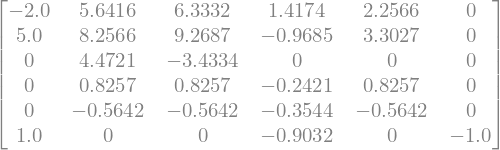

In [8]:
jac = []
for i in range(len(J)):
    jac.append([])
    for j in range(len(J[0])):
        jac[i].append(round((J[i][j].subs([(theta1, rad(55.6559)), (theta2, rad(8.8137)), (theta3, rad(-124.2289)), (theta4, rad(0.0)), (theta5, rad(-64.5848)), (theta6, rad(55.6559))]).evalf()), 4))

Matrix(jac)

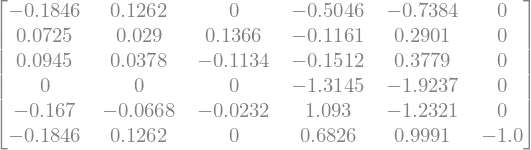

In [14]:
import numpy as np

jacobs = np.array(jac, dtype=float)

j_inv = Matrix(np.linalg.inv(jacobs))

arredNUM(j_inv, 4)

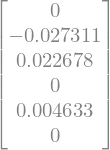

In [17]:
xi = Matrix([
    [0], 
    [0], 
    [-0.2], 
    [0], 
    [0], 
    [0]
])

arredNUM((j_inv@xi), 6)